# Base de dados housing

In [2]:
#importando a biblioteca pandas
import pandas as pd

In [3]:
#Base de dados baseados no censo de 1990 referentes aos preços do setor imobiliário na Califórnia.
#Cada linha representa um bairro com um total de dez atributos.
housing = pd.read_csv('../datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#residências próximo na parte insular
housing.loc[housing['ocean_proximity'] == 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [7]:
#Existem dados nulos no atributo totao_bedrooms
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
housing.loc[pd.isnull(housing['total_bedrooms'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [10]:
median = housing["total_bedrooms"].median() # média
housing["total_bedrooms"].fillna(median, inplace=True)

In [11]:
housing['total_bedrooms'].isnull().sum()

0

In [12]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_6308\2522582876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [13]:
#Criando uma nova categoria
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [14]:
housing['income_cat'].unique()

array([5., 4., 3., 2., 1.])

In [15]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5650,-118.29,33.74,30.0,2074.0,533.0,1311.0,531.0,2.0329,225800.0,NEAR OCEAN,2.0
16329,-121.34,38.02,30.0,4375.0,689.0,2038.0,709.0,5.1202,133800.0,INLAND,4.0
4265,-118.32,34.10,28.0,1759.0,716.0,1463.0,620.0,1.7306,450000.0,<1H OCEAN,2.0
16276,-121.26,37.93,33.0,2109.0,531.0,2248.0,588.0,1.4583,53000.0,INLAND,1.0
19000,-121.94,38.35,8.0,3157.0,559.0,1758.0,569.0,4.4120,140100.0,INLAND,3.0


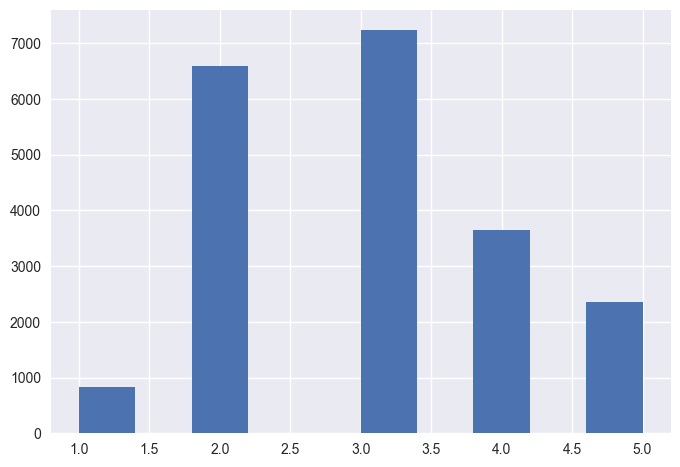

In [16]:
#Histograma das categorias de renda
plt.hist(x = housing['income_cat']);

In [17]:
#Criando novas colunas
housing["rooms/household"] = housing["total_rooms"]/housing["households"] #quartos por moradia
housing["bedrooms/room"] = housing["total_bedrooms"]/housing["total_rooms"] #dormitórios por cômodos
housing["population/household"]=housing["population"]/housing["households"] #pessoas por moradia

In [18]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms/household,bedrooms/room,population/household
8022,-118.12,33.84,37.0,2143.0,382.0,1047.0,377.0,4.4423,216000.0,<1H OCEAN,3.0,5.684350,0.178255,2.777188
11868,-121.09,40.30,15.0,1717.0,336.0,501.0,206.0,3.6477,113400.0,INLAND,3.0,8.334951,0.195690,2.432039
10606,-117.81,33.68,8.0,1964.0,413.0,913.0,406.0,5.1583,192200.0,<1H OCEAN,4.0,4.837438,0.210285,2.248768
10713,-117.84,33.66,5.0,665.0,171.0,384.0,171.0,4.5833,230400.0,<1H OCEAN,4.0,3.888889,0.257143,2.245614
14710,-117.07,32.78,26.0,3725.0,623.0,1516.0,627.0,4.7143,268300.0,NEAR OCEAN,4.0,5.940989,0.167248,2.417863


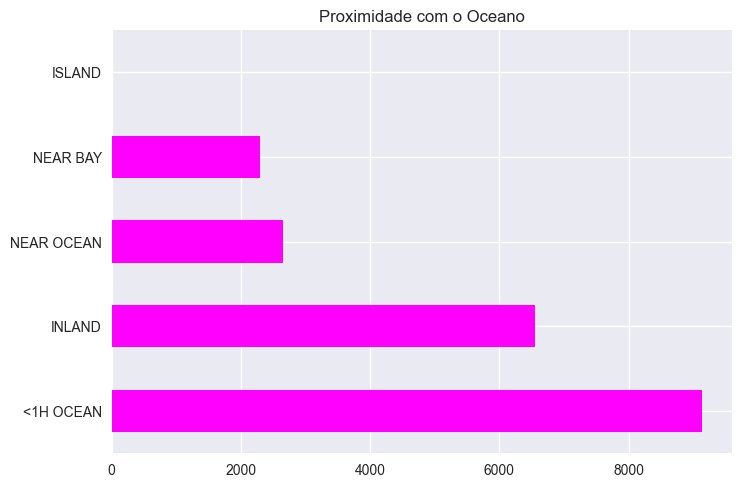

In [19]:
housing["ocean_proximity"].value_counts().plot.barh(title="Proximidade com o Oceano", color="magenta");

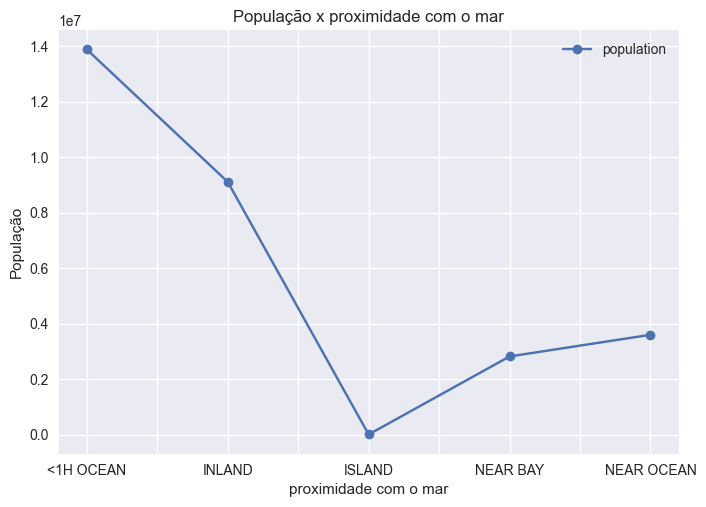

In [20]:
housing.groupby('ocean_proximity')["population"].sum().plot(title = "População x proximidade com o mar", marker = "o");
plt.xlabel("proximidade com o mar")
plt.ylabel("População")
plt.legend();

In [21]:
df1 = housing.loc[housing['ocean_proximity'] == '<1H OCEAN']
df2 = housing.loc[housing['ocean_proximity'] == 'INLAND']
df3 = housing.loc[housing['ocean_proximity'] == 'NEAR OCEAN']
df4 = housing.loc[housing['ocean_proximity'] == 'NEAR BAY']
df5 = housing.loc[housing['ocean_proximity'] == 'ISLAND']

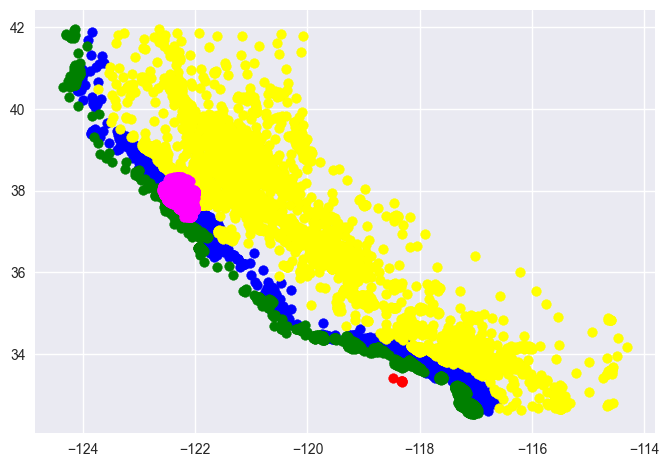

In [22]:
#Diagrama de dispersão longitude x latitude separado pela categoria "ocean_proximity"
plt.scatter(x=df1["longitude"], y = df1["latitude"],  color="blue");
plt.scatter(x=df2["longitude"], y = df2["latitude"],  color="yellow");
plt.scatter(x=df3["longitude"], y = df3["latitude"],  color="green");
plt.scatter(x=df4["longitude"], y = df4["latitude"],  color="magenta");
plt.scatter(x=df5["longitude"], y = df5["latitude"],  color="red");
